<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Этап-1.-Подготовка-данных" data-toc-modified-id="Этап-1.-Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Этап 1. Подготовка данных</a></span></li><li><span><a href="#Этап-2.-Анализ-данных" data-toc-modified-id="Этап-2.-Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Этап 2. Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Этап-2.1-Скользящее-среднее" data-toc-modified-id="Этап-2.1-Скользящее-среднее-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Этап 2.1 Скользящее среднее</a></span></li><li><span><a href="#Этап-2.2-Тренд-и-сезонность" data-toc-modified-id="Этап-2.2-Тренд-и-сезонность-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Этап 2.2 Тренд и сезонность</a></span></li><li><span><a href="#Этап-2.3-Стационарность-ряда" data-toc-modified-id="Этап-2.3-Стационарность-ряда-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Этап 2.3 Стационарность ряда</a></span></li></ul></li><li><span><a href="#Этап-3.-Обучение-модели" data-toc-modified-id="Этап-3.-Обучение-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Этап 3. Обучение модели</a></span><ul class="toc-item"><li><span><a href="#Этап-3.1-Создание-признаков" data-toc-modified-id="Этап-3.1-Создание-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Этап 3.1 Создание признаков</a></span></li><li><span><a href="#Этап-3.2-Деление-на-выборки" data-toc-modified-id="Этап-3.2-Деление-на-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Этап 3.2 Деление на выборки</a></span></li><li><span><a href="#Этап-3.3-Деление-на-признаки-и-целевой-признак" data-toc-modified-id="Этап-3.3-Деление-на-признаки-и-целевой-признак-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Этап 3.3 Деление на признаки и целевой признак</a></span></li><li><span><a href="#Этап-3.4-Метрика-качества" data-toc-modified-id="Этап-3.4-Метрика-качества-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Этап 3.4 Метрика качества</a></span></li><li><span><a href="#Этап-3.5-Обучение-модели-линейной-регрессии-LinearRegression()" data-toc-modified-id="Этап-3.5-Обучение-модели-линейной-регрессии-LinearRegression()-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Этап 3.5 Обучение модели линейной регрессии LinearRegression()</a></span></li><li><span><a href="#Этап-3.6-Обучение-модели-LightGBMRegressor()" data-toc-modified-id="Этап-3.6-Обучение-модели-LightGBMRegressor()-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Этап 3.6 Обучение модели LightGBMRegressor()</a></span></li><li><span><a href="#Этап-3.7-Обучение-модели-RandomForestRegressor()" data-toc-modified-id="Этап-3.7-Обучение-модели-RandomForestRegressor()-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Этап 3.7 Обучение модели RandomForestRegressor()</a></span></li></ul></li><li><span><a href="#Этап-4.-Тестирование-лучшей-модели" data-toc-modified-id="Этап-4.-Тестирование-лучшей-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Этап 4. Тестирование лучшей модели</a></span></li></ul></div>

<div style='border:solid green 5px; padding: 40px'>

# <font color='darkgreen'>**Проект по разработке модели для прогнозирования заказов такси**</font>
    
</div>

_**Цель проекта: разработать модель для прогнозирования количества заказов такси на следующий час.**_

**Описание проекта:**

_Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Необходимо построить модель для такого предсказания._

_Значение метрики *RMSE* на тестовой выборке должно быть не больше 48._ 

## Этап 1. Подготовка данных

In [1]:
# импорты из стандартной библиотеки
import warnings

# импорты сторонних библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# импорты модулей текущего проекта
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
from lightgbm import LGBMRegressor

# настройки
warnings.filterwarnings("ignore")

In [2]:
# откроем файл  и сразу приведем к удобному формату

try:
    data = pd.read_csv('taxi.csv', index_col=['datetime'], parse_dates=['datetime'])
except:
    data = pd.read_csv('/datasets/taxi.csv', index_col=['datetime'], parse_dates=['datetime'])

In [3]:
# посмотрим первые строки датафрейма

data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [4]:
# посмотрим основную информацию о датафрейме

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [5]:
# проверим есть ли пропуски

data.isna().sum()

num_orders    0
dtype: int64

In [6]:
# проверим хронологический порядок datetime

data.index.is_monotonic_increasing

True

In [7]:
# посмотрим какой период охватывают данные

print(data.index.min())
print(data.index.max())

2018-03-01 00:00:00
2018-08-31 23:50:00


У нас имеются данные по заказам такси за каждые 10 минут в период с 1 марта 2018 по 31 августа 2018 в хронологическом порядке возрастания без пропущенных значений. Количество заказов находится в столбце num_orders. 

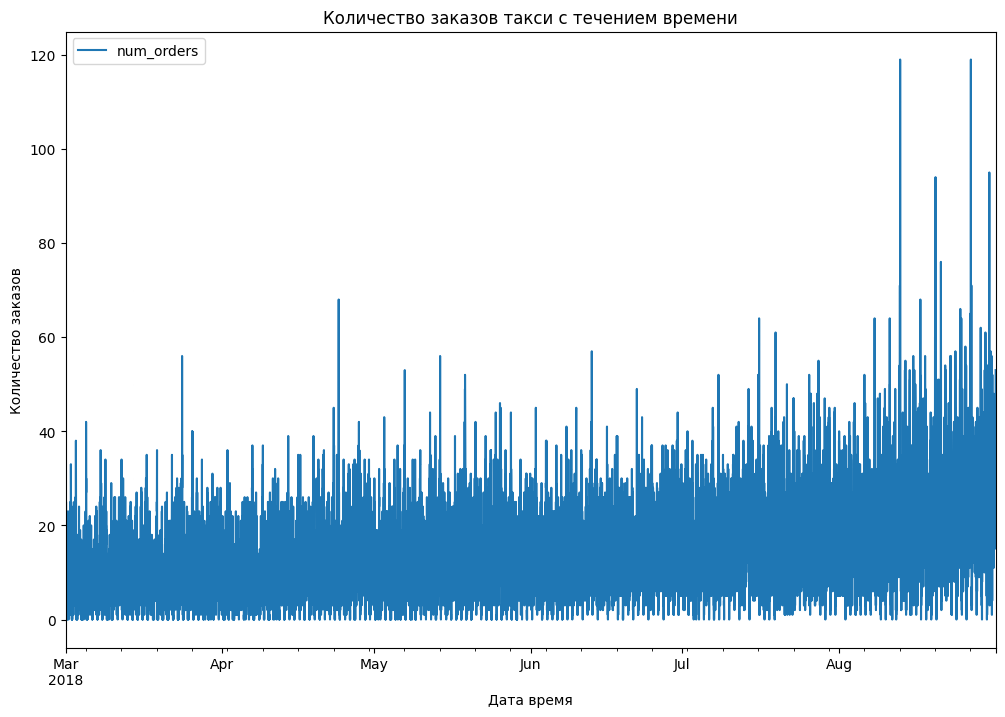

In [8]:
# построим на графике как меняется количество заказов с течением времени

data.plot(figsize=(12, 8))
plt.xlabel('Дата время')
plt.ylabel('Количество заказов')
plt.title('Количество заказов такси с течением времени');

In [9]:
# выполним ресемплирование данных по одному часу.

data = data.resample('1H').sum()
data

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


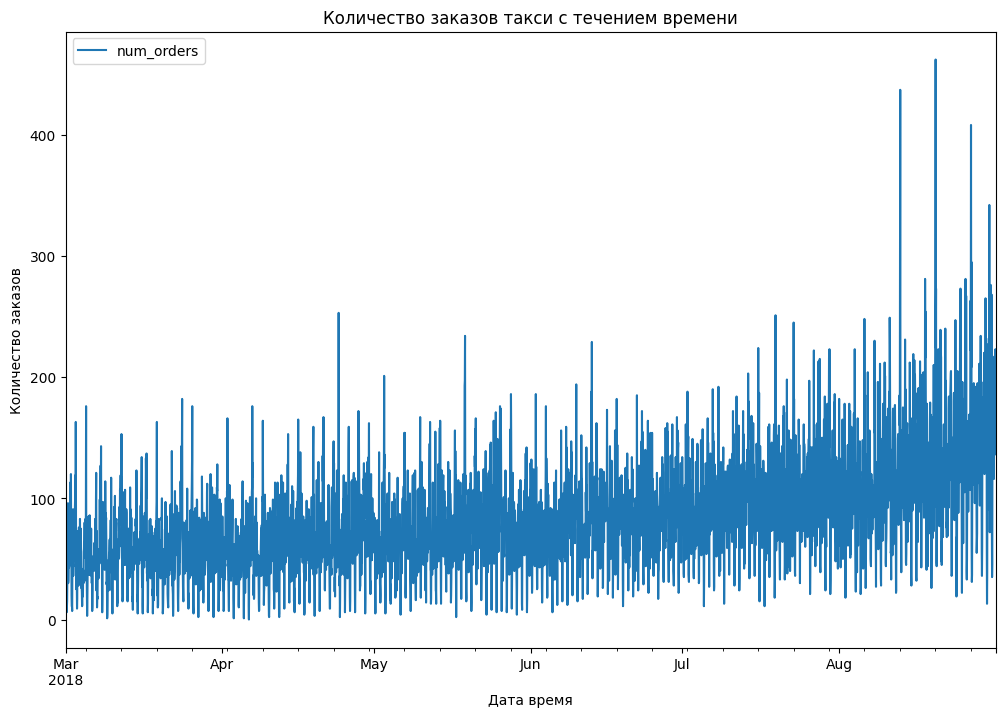

In [10]:
# построим на графике как меняется количество заказов после ресемплирования по часу

data.plot(figsize=(12, 8))
plt.xlabel('Дата время')
plt.ylabel('Количество заказов')
plt.title('Количество заказов такси с течением времени');

Посмотрим укрупненно на график в разрезе последнего месяца

In [11]:
data_aug = data['2018-08-01':'2018-08-31']

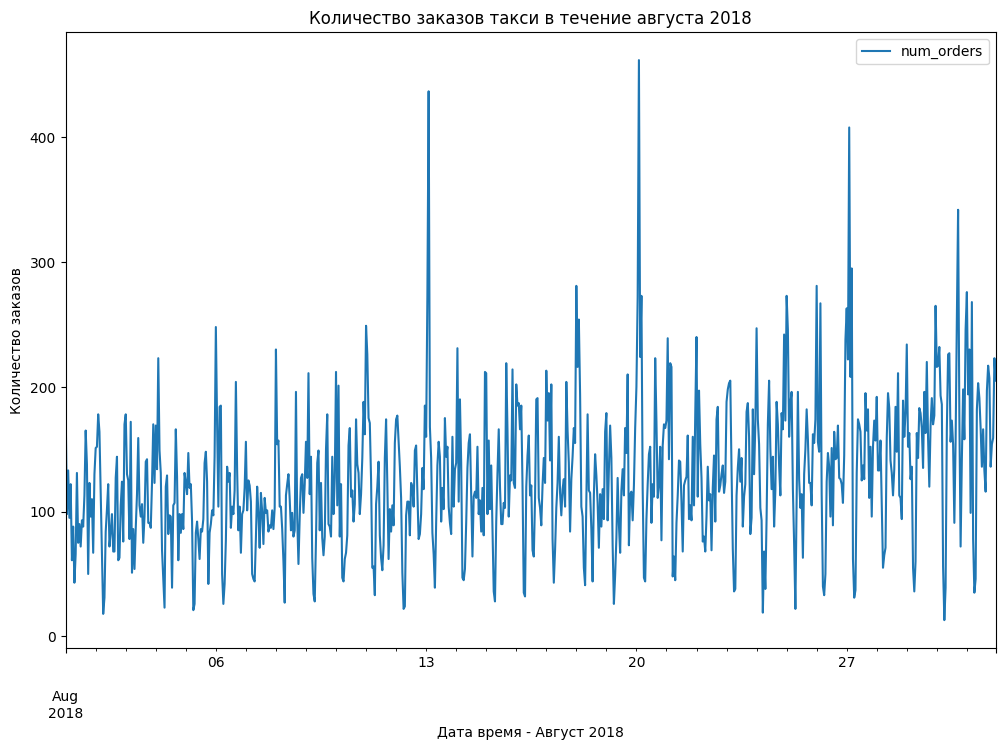

In [12]:
# построим на графике как меняется количество заказов после ресемплирования по часу в августе 2018

data_aug.plot(figsize=(12, 8))
plt.xlabel('Дата время - Август 2018')
plt.ylabel('Количество заказов')
plt.title('Количество заказов такси в течение августа 2018');

Заметны пики каждые 7 дней в начале суток, по календарю это соответствует понедельникам. Пики в первой половине/трети суток означают ночной период, в который общественный транспорт как правило не работает или движение ограничено. Дальнейший анализ поможет выявить тренды и сезонность.

<div style='border:solid green 5px; padding: 40px'>

**Вывод по Этапу 1:**

У нас имеются исторические данные по заказам такси в аэропортах за каждые 10 минут в период с 1 марта 2018 по 31 августа 2018. Данные идут по возрастанию в хронологическом порядке без пропущенных значений. Количество заказов находится в столбце num_orders. Для удобства выполнено ресемплирование временного ряда в часовые интервалы.


</div>

## Этап 2. Анализ данных

### Этап 2.1 Скользящее среднее

Чтобы снизить колебания во временном ряду применим метод сглаживания временных рядов - найдем скользящее среднее.

In [13]:
# для удобства анализа будем использовать часть временного ряда - последний месяц - август 2018

data_rol_mean = data_aug.copy()

In [14]:
# создадим дополнительный столбец со значением скользящего среднего с размером окна 12 часов

data_rol_mean['rolling_mean'] = data_rol_mean.rolling(12).mean()

In [15]:
# посмотрим, что получилось

data_rol_mean.head(15)

,num_orders,rolling_mean
datetime,,
2018-08-01 00:00:00,182,NaN
2018-08-01 01:00:00,98,NaN
2018-08-01 02:00:00,133,NaN
2018-08-01 03:00:00,95,NaN
2018-08-01 04:00:00,122,NaN
2018-08-01 05:00:00,61,NaN
2018-08-01 06:00:00,88,NaN
2018-08-01 07:00:00,43,NaN
2018-08-01 08:00:00,66,NaN


In [16]:
# заполним пустые значения

data_rol_mean.rolling_mean = data_rol_mean.rolling_mean.fillna(0)

In [17]:
data_rol_mean.head(15)

,num_orders,rolling_mean
datetime,,
2018-08-01 00:00:00,182,0.000000
2018-08-01 01:00:00,98,0.000000
2018-08-01 02:00:00,133,0.000000
2018-08-01 03:00:00,95,0.000000
2018-08-01 04:00:00,122,0.000000
2018-08-01 05:00:00,61,0.000000
2018-08-01 06:00:00,88,0.000000
2018-08-01 07:00:00,43,0.000000
2018-08-01 08:00:00,66,0.000000


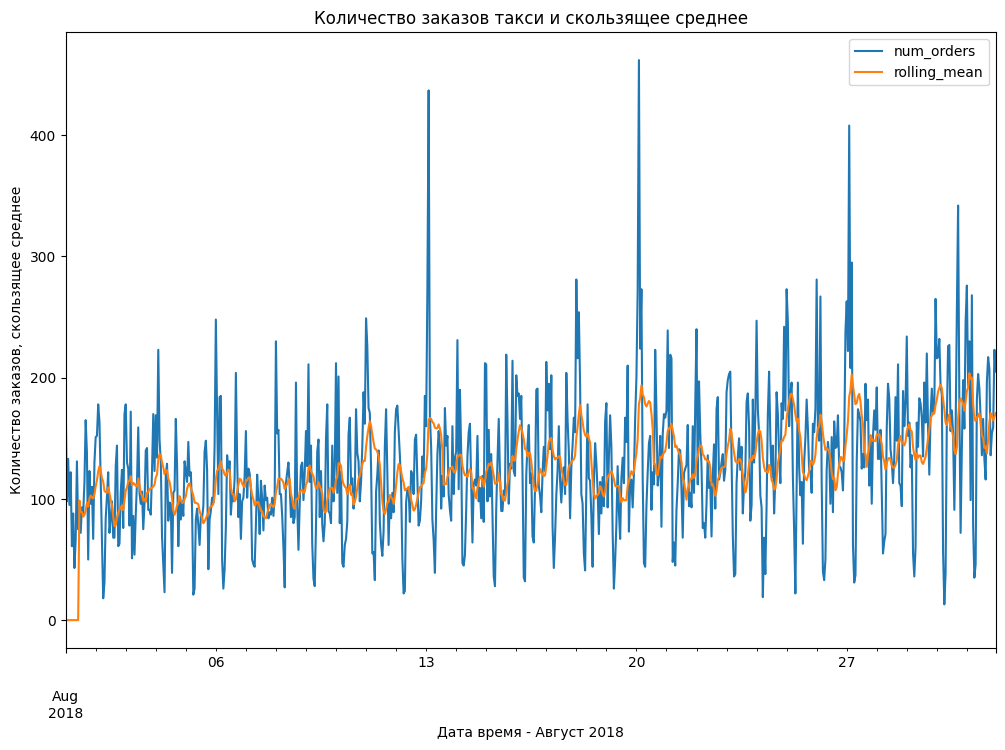

In [18]:
# посмотрим на графике количество заказов и скользящее среднее 

data_rol_mean.plot(figsize=(12, 8))
plt.xlabel('Дата время - Август 2018')
plt.ylabel('Количество заказов, скользящее среднее')
plt.title('Количество заказов такси и скользящее среднее');

Скользящее среднее дает функцию тренда, в наибольшей мере приближенную к значениям исследуемого ряда, поскольку для отдельных частей ряда выбирается наилучшая тенденция. Как мы видим пики заказов приходятся на конец недели (уикэнд).

### Этап 2.2 Тренд и сезонность

Поищем тренды и сезонность с помощью функции seasonal_decompose().

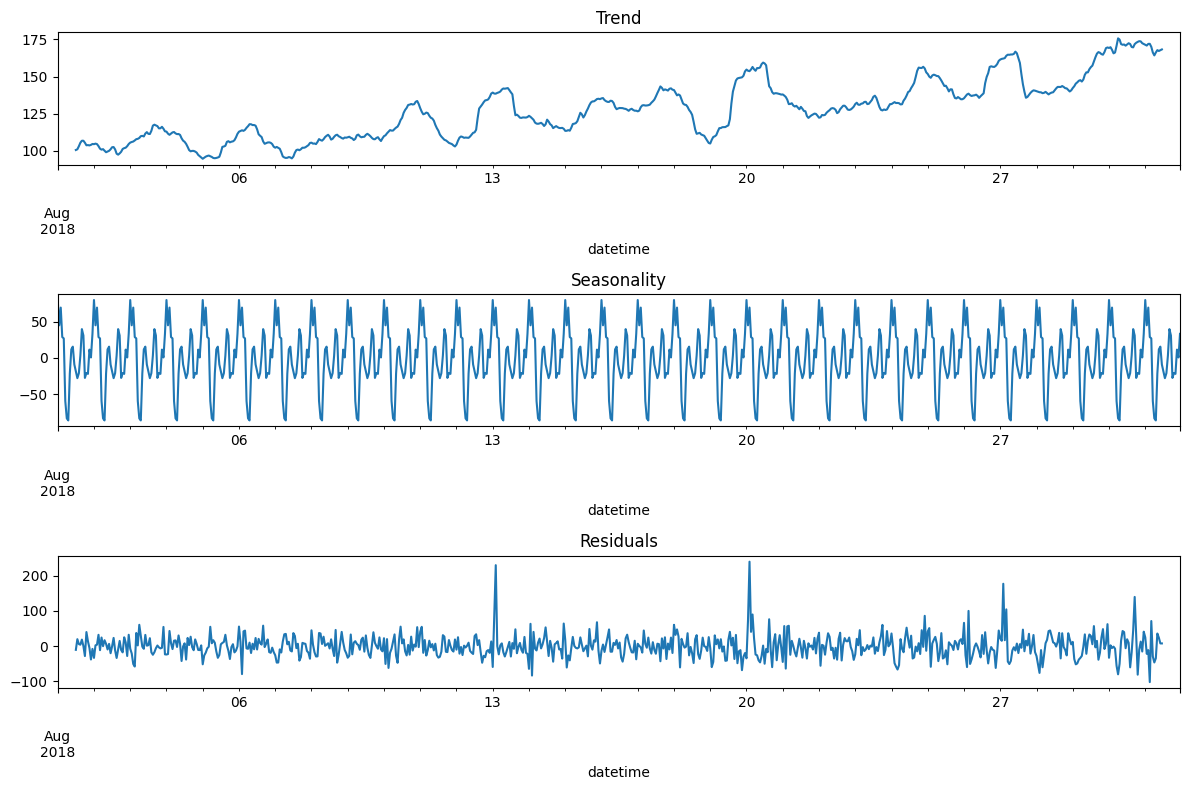

In [19]:
# посмотрим на графике тренды, сезонность, шум в выбранном нами периоде - августе 2018

decomposed = seasonal_decompose(data_aug.num_orders)

plt.figure(figsize=(12, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

Мы наблюдаем восходящий тренд к концу месяца. Это скорее всего связано с большим количеством людей, возвращающихся из отпусков к началу учебного года, включая тех, кто уезжал например в начале лета. Но т.к. данные имеются за период менее года мы не можем утверждать, что присутствует месячная сезонность.

Мы наблюдаем суточную и часовую сезонность, когда наибольшее количество заказов в начале суток и в конце, т.е. в ночной период, когда не доступен общественный транспорт, а также в уикэнды.

Также имеется график остатка декомпозиции - шума, который как правило не объясняется трендом и сезонностью. Но на нем прослеживаются ночные понедельничные всплески заказов. Это может быть связано с возвращением людей из командировок/отпусков прямо к началу рабочего дня.

### Этап 2.3 Стационарность ряда

Прогнозировать данные помогают стационарные ряды, у которых среднее и стандартное отклонение не меняются. Нестационарные ряды прогнозировать сложнее: их свойства меняются слишком быстро.

Найдем скользящее стандартное отклонение для нашего временного ряда.

In [20]:
# для удобства анализа будем использовать часть временного ряда - последний месяц - август 2018

data_std = data_rol_mean.copy()

In [21]:
# создадим дополнительный столбец со значением стандартного отклонения с размером окна 12 часов

data_std['std'] = data_std.num_orders.rolling(12).std()

In [22]:
data_std.head(15)

,num_orders,rolling_mean,std
datetime,,,
2018-08-01 00:00:00,182,0.000000,NaN
2018-08-01 01:00:00,98,0.000000,NaN
2018-08-01 02:00:00,133,0.000000,NaN
2018-08-01 03:00:00,95,0.000000,NaN
2018-08-01 04:00:00,122,0.000000,NaN
2018-08-01 05:00:00,61,0.000000,NaN
2018-08-01 06:00:00,88,0.000000,NaN
2018-08-01 07:00:00,43,0.000000,NaN
2018-08-01 08:00:00,66,0.000000,NaN


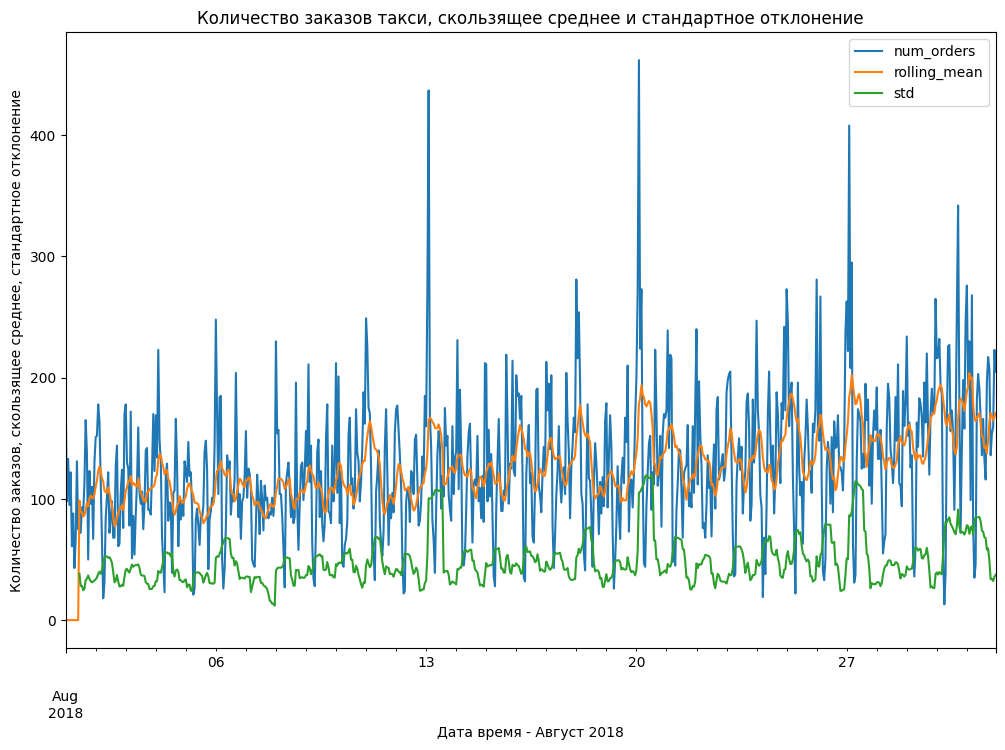

In [23]:
# посмотрим на графике количество заказов, скользящее среднее и скользящее стандартное отклонение

data_std.plot(figsize=(12, 8))
plt.xlabel('Дата время - Август 2018')
plt.ylabel('Количество заказов, скользящее среднее, стандартное отклонение')
plt.title('Количество заказов такси, скользящее среднее и стандартное отклонение');

Как хорошо видно на графике, скользящие средние и стандартные отклонения меняются, значит ряд нестационарный. 

Чтобы ряд сделать стационарным, найдём разности его значений. Для поиска разностей временного ряда применяется метод shift().

In [24]:
# в новую переменную сохраним разности значений по выбранному участку временного ряда - августа 2018

time_series_difference = data_std - data_std.shift(fill_value=0)

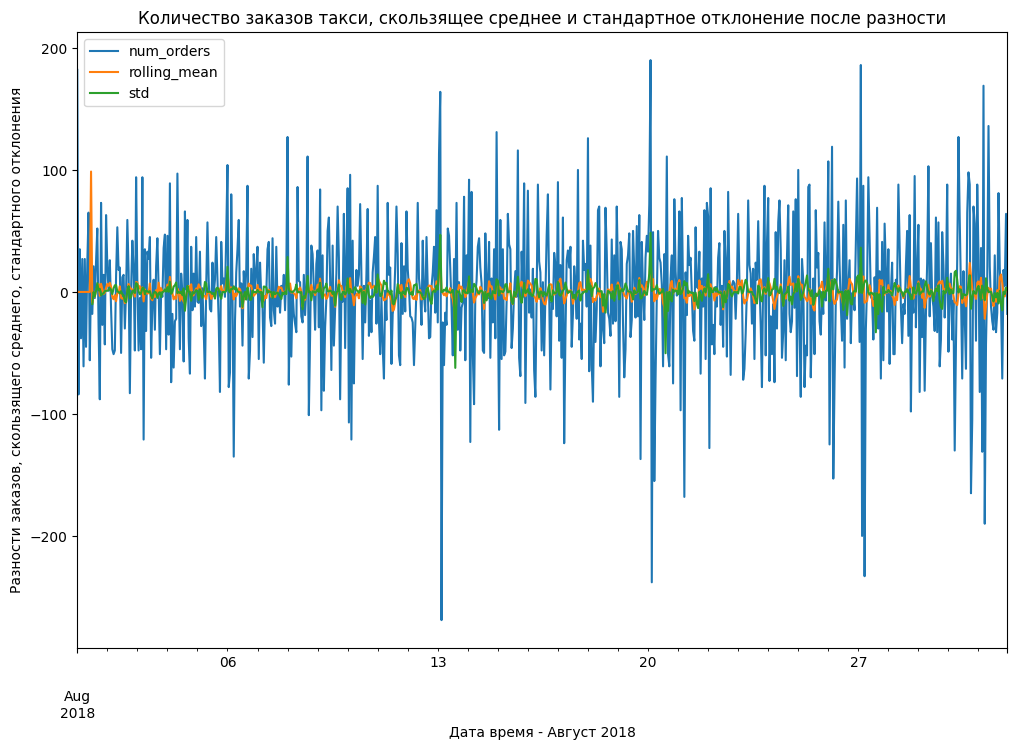

In [25]:
# посмотрим теперь на графике количество заказов, скользящее среднее и стандартное отклонение за август 2018

time_series_difference.plot(figsize=(12, 8))
plt.xlabel('Дата время - Август 2018')
plt.ylabel('Разности заказов, скользящего среднего, стандартного отклонения')
plt.title('Количество заказов такси, скользящее среднее и стандартное отклонение после разности');

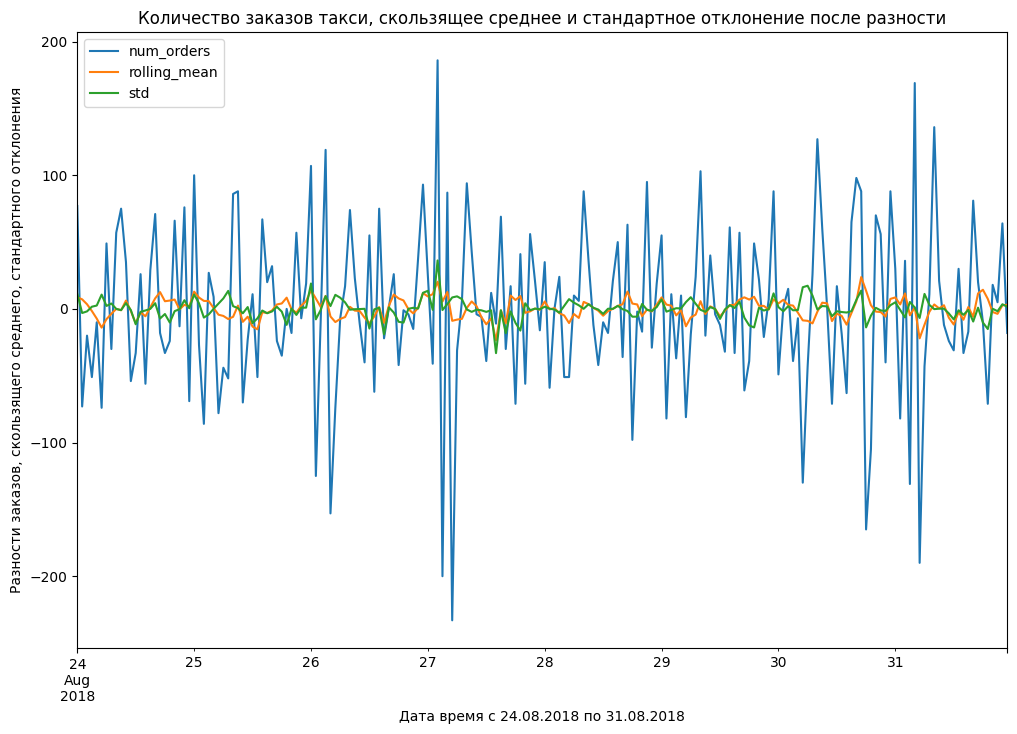

In [26]:
# посмотрим укрупненнно - в течение последней недели - на количество заказов, скользящее среднее и стандартное отклонение
# после расчета разности значений

time_series_difference['2018-08-24':'2018-08-31'].plot(figsize=(12, 8))
plt.xlabel('Дата время с 24.08.2018 по 31.08.2018')
plt.ylabel('Разности заказов, скользящего среднего, стандартного отклонения')
plt.title('Количество заказов такси, скользящее среднее и стандартное отклонение после разности');

Разности временного ряда более стационарны, чем сам ряд.

<div style='border:solid green 5px; padding: 40px'>

**Вывод по Этапу 2:**

Анализ временного ряда проводился с помощью скользящего среднего, скользящего стандартного отклонения, с помощью функции seasonal_decompose() на данных участка временного ряда - периода с 01.08.2018 по 31.08.2018.
    
Скользящее среднее показало, что пики заказов приходятся на конец недели (уикэнд). 
 
Разложение на компоненты seasonal_decompose() показало:
- восходящий тренд к концу месяца, что связано с большим количеством людей, возвращающихся из отпусков к началу учебного года;
- суточную сезонность, когда наибольшее количество заказов приходится на ночной период, когда не доступен общественный транспорт;
- на графике шума заметны ночные понедельничные всплески заказов, чтоможет быть связано с возвращением людей из командировок/отпусков прямо к началу рабочего дня.   

Прогнозировать данные помогают стационарные ряды, у которых среднее и стандартное отклонение не меняются. Нестационарные ряды прогнозировать сложнее, т.к. их свойства меняются слишком быстро.

Чтобы сделать наш ряд стационарным, нашли разности его значений с помощью метода shift().
Разности временного ряда оказались более стационарны, чем сам ряд.

</div>

## Этап 3. Обучение модели

### Этап 3.1 Создание признаков

Создадим признаки для горизонта прогнозирования в один шаг на основе анализа из предыдущего этапа.
Календарные признаки возьмем из datetime, он уже содержит нужную информацию, нужно лишь представить её как отдельные столбцы.
«Отстающие значения» - предыдущие значения временного ряда подскажут, будет ли функция x(t) расти или уменьшаться. Получим отстающие значения функцией shift().
Скользящее среднее как признак задаёт общий тренд временного ряда.

In [27]:
# напишем функцию для создания признаков

def make_features(data, max_lag, rolling_mean_size):
    data['hour'] = data.index.hour
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

In [28]:
# добавим признаки

make_features(data, 1, 24)
data.head()

,num_orders,hour,dayofweek,lag_1,rolling_mean
datetime,,,,,
2018-03-01 00:00:00,124,0,3,NaN,NaN
2018-03-01 01:00:00,85,1,3,124.0,NaN
2018-03-01 02:00:00,71,2,3,85.0,NaN
2018-03-01 03:00:00,66,3,3,71.0,NaN
2018-03-01 04:00:00,43,4,3,66.0,NaN


In [29]:
# удалим из выборки строки с пропусками

data = data.dropna()

### Этап 3.2 Деление на выборки

По исходным данным создадим обучающую (data_train) и тестовую (data_test) выборки. Перемешивать выборки в задаче прогнозирования временного ряда нельзя. Данные обучающей выборки должны предшествовать данным тестовой.

In [30]:
# создадим выборки

data_train, data_test = train_test_split(data, test_size=0.1, shuffle=False)

In [31]:
# распечатаем размеры выборок

print(f'Размер обучающей выборки: {data_train.shape}')
print(f'Размер тестовой выборки: {data_test.shape}')

Размер обучающей выборки: (3952, 5)
Размер тестовой выборки: (440, 5)


In [32]:
# проверим корректно ли поделились выборки

print(f'Начало обучающей выборки: {data_train.index.min()}')
print(f'Конец обучающей выборки: {data_train.index.max()}')
print()
print(f'Начало тестовой выборки: {data_test.index.min()}')
print(f'Конец тестовой выборки: {data_test.index.max()}')

Начало обучающей выборки: 2018-03-02 00:00:00
Конец обучающей выборки: 2018-08-13 15:00:00

Начало тестовой выборки: 2018-08-13 16:00:00
Конец тестовой выборки: 2018-08-31 23:00:00


### Этап 3.3 Деление на признаки и целевой признак

In [33]:
# выделение целевого признака

features_train = data_train.drop('num_orders', axis=1)
target_train = data_train.num_orders

features_test = data_test.drop('num_orders', axis=1)
target_test = data_test.num_orders

### Этап 3.4 Метрика качества

Чтобы проверять качество моделей в наших задачах, возьмём метрику RMSE.

Спрогнозировать временные ряды без обучения можно двумя способами:

1. Все значения тестовой выборки предсказываются одним и тем же числом - константой, например, медианой.
2. Новое значение x(t) прогнозируется предыдущим значением ряда, то есть x(t-1). Этот способ не зависит от метрики.

In [34]:
# оценим модель прогнозом константой

pred_median = np.ones(data_test.shape) * data_train['num_orders'].median()
rmse_pred_median = mean_squared_error(data_test, pred_median)**0.5
print("RMSE:", rmse_pred_median)

RMSE: 75.87388714383663


In [35]:
# оценим модель предыдущим значением ряда 

pred_previous = data_test.shift()
pred_previous.iloc[0] = data_train.iloc[-1]
rmse_pred_previous = mean_squared_error(data_test, pred_previous)**0.5
print("RMSE:", rmse_pred_previous)

RMSE: 37.347018997065504


Теперь нам есть с чем оценивать адекватность наших моделей. По заданию значение метрики RMSE на тестовой выборке должно быть не больше 48.

### Этап 3.5 Обучение модели линейной регрессии LinearRegression()

In [36]:
# обучение линейной регрессии

model_lr = LinearRegression()
cross_val_lr = cross_val_score(model_lr, features_train, target_train, 
                         cv = TimeSeriesSplit(n_splits=8), 
                         n_jobs = -1, 
                         scoring = 'neg_root_mean_squared_error')


print(f'RMSE LinearRegression() обучающей выборки: {cross_val_lr.mean()*-1}')

RMSE LinearRegression() обучающей выборки: 31.34322751744601


**Вывод:** На обучающей выборке получено хорошее значение метрики RMSE, лучше, чем у бэйзлайн-моделей.

### Этап 3.6 Обучение модели LightGBMRegressor()

In [37]:
# инициируем модель

lgbm = LGBMRegressor()

In [38]:
# составим список параметров для GridSearchCV

parameters_lgbm = {'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
              'max_depth': [5, 15, 20, 25],
              'n_estimators': [50, 100, 150],
              'subsample': [0.5, 0.7, 1],
              'colsample_bytree': [0.5, 0.7, 1],
              'num_leaves': [3, 4, 5]
             }

tss = TimeSeriesSplit(n_splits=8)

In [39]:
# обучим модель

grid_lgbm = GridSearchCV(lgbm, param_grid=parameters_lgbm, scoring='neg_root_mean_squared_error', cv=tss)
grid_lgbm.fit(features_train, target_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=8, test_size=None),
             estimator=LGBMRegressor(),
             param_grid={'colsample_bytree': [0.5, 0.7, 1],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'max_depth': [5, 15, 20, 25],
                         'n_estimators': [50, 100, 150],
                         'num_leaves': [3, 4, 5], 'subsample': [0.5, 0.7, 1]},
             scoring='neg_root_mean_squared_error')

In [40]:
grid_lgbm_best_score = grid_lgbm.best_score_ * -1
grid_lgbm_best_params = grid_lgbm.best_params_

# лучшее значение RMSE на кросс-валидации
print(f'RMSE LightGBMRegressor() обучающей выборки: {grid_lgbm_best_score}')

# лучшие гиперпараметры
print(f'best_params: {grid_lgbm_best_params}')

RMSE LightGBMRegressor() обучающей выборки: 24.61660149656573
best_params: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150, 'num_leaves': 5, 'subsample': 0.5}


**Вывод:** На обучающей выборке получено очень хорошее значение метрики RMSE, значительно лучше, чем при прогнозировании предыдущим значением, а также лучше результата модели линейной регрессии.

### Этап 3.7 Обучение модели RandomForestRegressor()

In [41]:
# инициируем модель

rfr = RandomForestRegressor()

In [42]:
# составим список параметров для GridSearchCV

parameters_rfr = {'max_depth': [5, 8, 11],
                  'n_estimators': [10, 31, 51]}

tss = TimeSeriesSplit(n_splits=8)

In [43]:
# обучим модель

grid_rfr = GridSearchCV(rfr, param_grid=parameters_rfr, scoring='neg_root_mean_squared_error', cv=tss)
grid_rfr.fit(features_train, target_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=8, test_size=None),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 8, 11], 'n_estimators': [10, 31, 51]},
             scoring='neg_root_mean_squared_error')

In [44]:
grid_rfr_best_score = grid_rfr.best_score_ * -1
grid_rfr_best_params = grid_rfr.best_params_

# лучшее значение RMSE на кросс-валидации
print(f'RMSE RandomForestRegressor() обучающей выборки: {grid_rfr_best_score}')

# лучшие гиперпараметры
print(f'best_params: {grid_rfr_best_params}')

RMSE RandomForestRegressor() обучающей выборки: 24.819372731636733
best_params: {'max_depth': 11, 'n_estimators': 51}


**Вывод:** На обучающей выборке получено качество модели, чуть-чуть уступающее модели LightGBM.

<div style='border:solid green 5px; padding: 40px'>

**Вывод по Этапу 3:**

На третьем этапе были созданы признаки для временного ряда: календарные, отстающие значения (1) и скользящее среднее (окно 24 часа).
    
Данные были поделены на две выборки, выделены признаки и целевой признак.
    
Обучены три модели: LinearRegression(),  LightGBMRegressor() и RandomForestRegressor().
    
Модели LightGBMRegressor() и RandomForestRegressor() показали хорошие результаты RMSE, с небольшим опережением победила **LightGBMRegressor() (RMSE = 24.61660149656573).** Именно её протестируем на тестовой выборке.


</div>

## Этап 4. Тестирование лучшей модели

In [45]:
# проверим модель на тестовой выборке

lgbm = LGBMRegressor(colsample_bytree=1, 
                     learning_rate=0.2, 
                     max_depth=5, 
                     n_estimators=150, 
                     num_leaves=5, 
                     subsample=0.5)

lgbm.fit(features_train, target_train)
pred_test_lgbm = lgbm.predict(features_test)

# распечатем результат на тестовой выборке

print("RMSE LightGBMRegressor() тестовой выборки: ", mean_squared_error(target_test, pred_test_lgbm)**0.5)

RMSE LightGBMRegressor() тестовой выборки:  42.83109059372669


Получена удовлетворительная метрика. Теперь для сравнения посмотрим на графике на работу модели.

In [46]:
# сохраним предсказания в датафрейм

pred = pd.DataFrame(pred_test_lgbm)
pred.head()

,0
0,146.062860
1,132.608690
2,98.202669
3,96.960431
4,97.379197


In [47]:
# сохраним истинные значения тестовой выборки в отдельную переменную, к которой потом присоединим предсказания

total_table = pd.DataFrame(target_test)
total_table.reset_index(inplace= True )
total_table.head()

,datetime,num_orders
0,2018-08-13 16:00:00,144
1,2018-08-13 17:00:00,152
2,2018-08-13 18:00:00,104
3,2018-08-13 19:00:00,91
4,2018-08-13 20:00:00,82


In [48]:
# создадим итоговую таблицу для графика

graph = total_table.join(pred)
graph.rename(columns = {0:'predictions'}, inplace = True)
graph.head()

,datetime,num_orders,predictions
0,2018-08-13 16:00:00,144,146.062860
1,2018-08-13 17:00:00,152,132.608690
2,2018-08-13 18:00:00,104,98.202669
3,2018-08-13 19:00:00,91,96.960431
4,2018-08-13 20:00:00,82,97.379197


In [49]:
# снова установим даты индексами таблицы

graph.set_index('datetime', inplace = True)
graph.head()

,num_orders,predictions
datetime,,
2018-08-13 16:00:00,144,146.062860
2018-08-13 17:00:00,152,132.608690
2018-08-13 18:00:00,104,98.202669
2018-08-13 19:00:00,91,96.960431
2018-08-13 20:00:00,82,97.379197


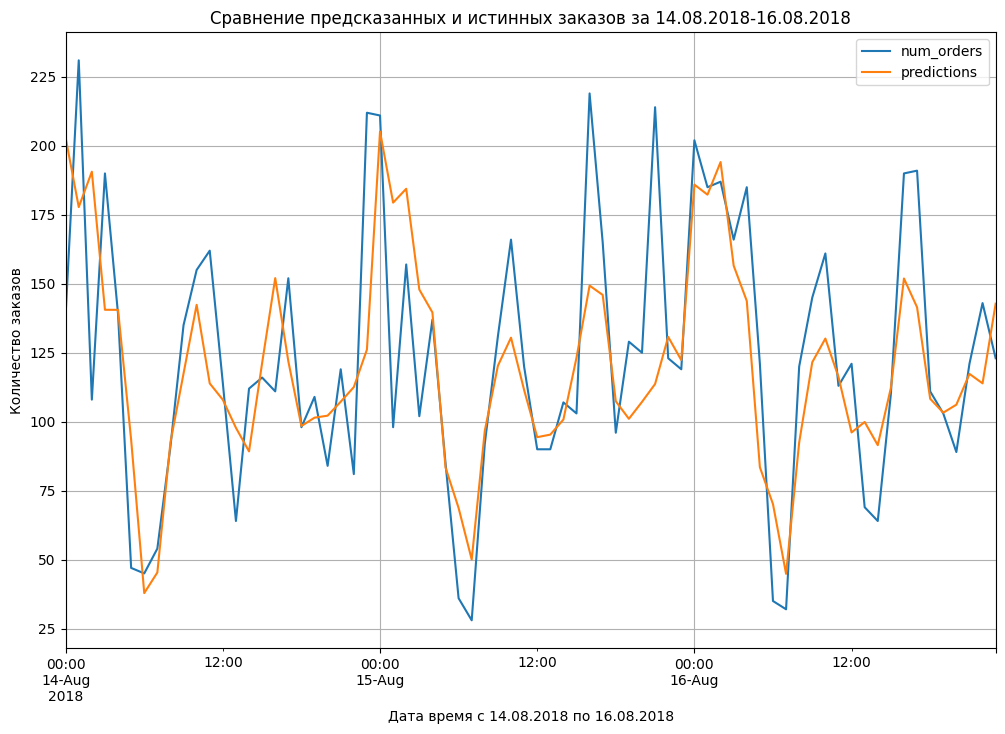

In [50]:
# нарисуем график за несколько дней периода тестовой выборки

graph['2018-08-14':'2018-08-16'].plot(figsize=(12, 8), grid=True)
plt.xlabel('Дата время с 14.08.2018 по 16.08.2018')
plt.ylabel('Количество заказов')
plt.title('Сравнение предсказанных и истинных заказов за 14.08.2018-16.08.2018');

В целом модель неплохо повторяет кривую заказов, сглаживает небольшие колебания, но при этом улавливает пики/провалы в заказах, и "перестраховывается", предсказывая заказов немного меньше, чем было на самом деле.

<div style='border:solid green 3px; padding: 40px'>

**Вывод по Этапу 4:**

В рамках задачи по созданию модели для предсказаний заказов такси по историческим данным заказчика за март-август 2018 были обучены три модели: LinearRegression(),  LightGBMRegressor() и RandomForestRegressor(). 
    
На обучающей выборке получено очень хорошее качество у моделей LightGBMRegressor() и RandomForestRegressor(). 
    
Лучшая модель **LightGBMRegressor()** на тестовой выборке показала результат **RMSE = 42.83109059372669**, что меньше 48 и удовлетворяет требованиям заказчика. Работа модели визуализирована на графике.
</div>